In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.set_option('display.max_columns', 100)
train = train.assign(FlrBsmtSF = train['GrLivArea'] + train['TotalBsmtSF'])
train = train.assign(Age=train['YrSold']-train['YearBuilt'])
test = test.assign(FlrBsmtSF = test['GrLivArea'] + test['TotalBsmtSF'])
test = test.assign(Age=test['YrSold']-test['YearBuilt'])

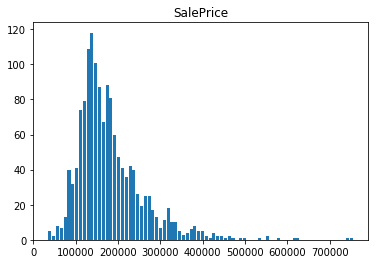

In [2]:
plt.title('SalePrice')
plt.hist(train['SalePrice'], bins = 80, rwidth = 0.8);

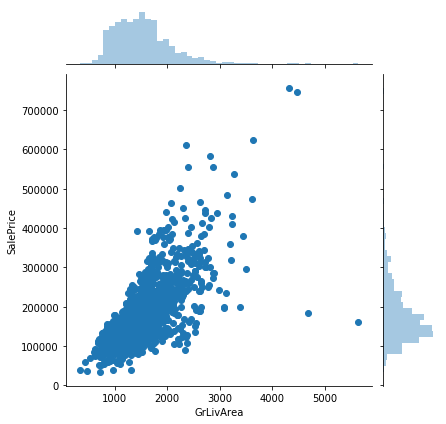

In [3]:
sns.jointplot('GrLivArea', 'SalePrice', data = train)

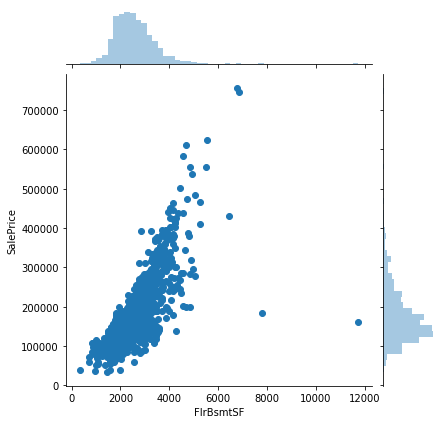

In [4]:
sns.jointplot('FlrBsmtSF', 'SalePrice', data = train)

In [5]:
train[train['FlrBsmtSF'] > 7000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,FlrBsmtSF,Age
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,7814,0
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000,11752,0


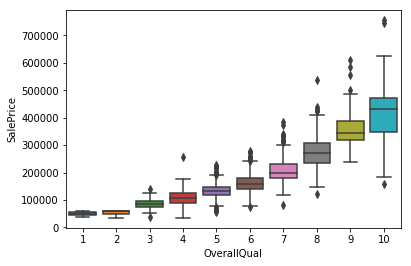

In [6]:
sns.boxplot('OverallQual', 'SalePrice', data = train)
# OverallQual: Rates the overall material and finish of the house

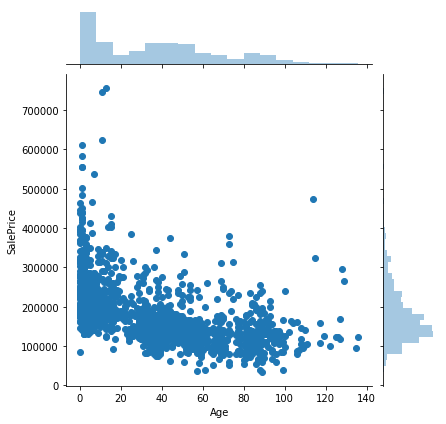

In [7]:
sns.jointplot('Age', 'SalePrice', data = train)

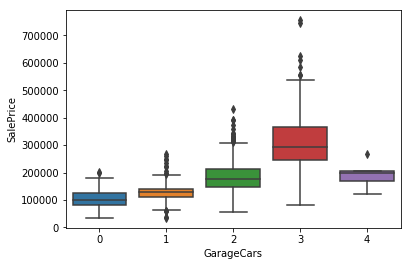

In [8]:
sns.boxplot('GarageCars', 'SalePrice', data=train)

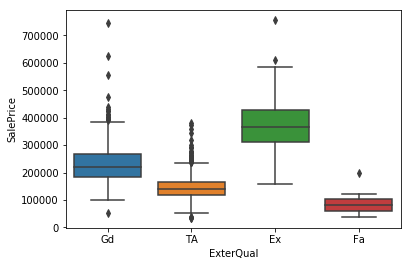

In [9]:
sns.boxplot('ExterQual', 'SalePrice', data = train)
# ExterQual: Evaluates the quality of the material on the exterior
# Ex	Excellent
# Gd	Good
# TA	Average/Typical
# Fa	Fair
# Po	Poor

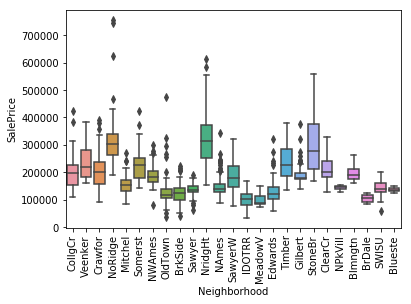

In [10]:
ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data=train,)
ax.set_xticklabels(train['Neighborhood'].unique(),rotation='vertical');

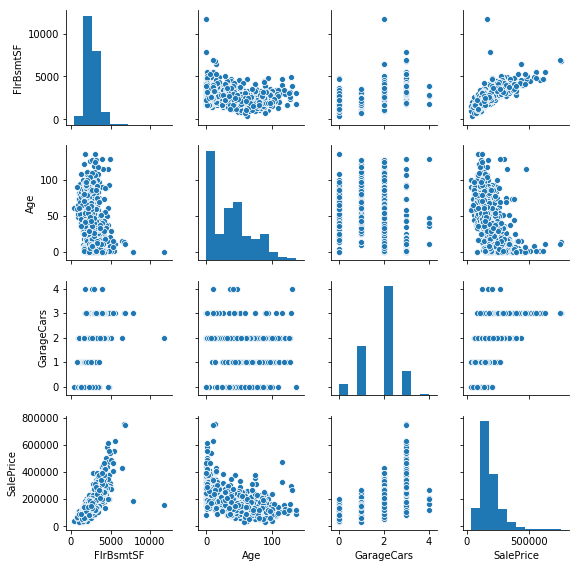

In [11]:
df = train.loc[:,['FlrBsmtSF', 'Age', 'GarageCars', 'SalePrice']]
sns.pairplot(df, height = 2.0)
plt.show()

In [12]:
def outlier_OverallQual(df):
    for i in df['OverallQual'].unique():
        col = df[df['OverallQual'] == i]['SalePrice']
        q1 = col.describe()['25%'] # 第一四分位数
        q3 = col.describe()['75%'] # 第三四分位数
        iqr = q3 - q1 #四分位範囲
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5
        df.loc[list(df.query('OverallQual == @i & SalePrice < @outlier_min').index),'SalePrice'] = None
        df.loc[list(df.query('OverallQual == @i & SalePrice > @outlier_max').index),'SalePrice'] = None
outlier_OverallQual(train)

In [13]:
def outlier_ExterQual(df):
    for i in df['ExterQual'].unique():
        col = df[df['ExterQual'] == i]['SalePrice']
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5
        df.loc[list(df.query('ExterQual == @i & SalePrice < @outlier_min').index),'SalePrice'] = None
        df.loc[list(df.query('ExterQual == @i & SalePrice > @outlier_max').index),'SalePrice'] = None
outlier_ExterQual(train)

In [14]:
def outlier_Neighborhood(df):
    for i in df['Neighborhood'].unique():
        col = df[df['Neighborhood'] == i]['SalePrice']
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 #四分位範囲
        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5
        df.loc[list(df.query('Neighborhood == @i & SalePrice < @outlier_min').index),'SalePrice'] = None
        df.loc[list(df.query('Neighborhood == @i & SalePrice > @outlier_max').index),'SalePrice'] = None
outlier_Neighborhood(train)

In [15]:
train.loc[list(train.query('FlrBsmtSF > 7000').index),'SalePrice'] = None

In [16]:
train = train.dropna(subset=['SalePrice'])

In [17]:
def OverallQual(df):
    for i in df['OverallQual'].unique():
        col = df[df['OverallQual'] == i]['SalePrice']
        mean = col.mean()
        df.loc[list(df.query('OverallQual == @i').index),'OverallQual'] = mean
        test.loc[list(test.query('OverallQual == @i').index),'OverallQual'] = mean
OverallQual(train)

In [18]:
def ExterQual(df):
    for i in df['ExterQual'].unique():
        col = df[df['ExterQual'] == i]['SalePrice']
        mean = col.mean()
        df.loc[list(df.query('ExterQual == @i').index),'ExterQual'] = mean
        test.loc[list(test.query('ExterQual == @i').index),'ExterQual'] = mean
ExterQual(train)

In [19]:
def Neighborhood(df):
    for i in df['Neighborhood'].unique():
        col = df[df['Neighborhood'] == i]['SalePrice']
        mean = col.mean()
        df.loc[list(df.query('Neighborhood == @i').index),'Neighborhood'] = mean
        test.loc[list(test.query('Neighborhood == @i').index),'Neighborhood'] = mean
Neighborhood(train)

In [20]:
train.loc[list(train.query('GarageCars == 4').index),'GarageCars'] = 3
test.loc[list(test.query('GarageCars == 4').index),'GarageCars'] = 3
def GarageCars(df):
    for i in df['GarageCars'].unique():
        col = df[df['GarageCars'] == i]['SalePrice']
        mean = col.mean()
        df.loc[list(df.query('GarageCars == @i').index),'GarageCars'] = mean
        test.loc[list(test.query('GarageCars == @i').index),'GarageCars'] = mean
GarageCars(train)

In [21]:
train['ExterQual'] = train['ExterQual'].astype(float)
train['Neighborhood'] = train['Neighborhood'].astype(float)
test['ExterQual'] = test['ExterQual'].astype(float)
test['Neighborhood'] = test['Neighborhood'].astype(float)

In [22]:
m = test.isnull().sum()
m[m>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
FlrBsmtSF          1
dtype: int64

In [23]:
test[test['TotalBsmtSF'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,FlrBsmtSF,Age
660,2121,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,119393.627451,Feedr,Norm,1Fam,1Story,108749.054545,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,139250.402161,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,128344.871508,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,NaN,62


In [24]:
test = test.fillna({'FlrBsmtSF': 896})

In [25]:
test[test['GarageCars'].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,FlrBsmtSF,Age
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,108480.5,Norm,Norm,1Fam,2Story,132507.435013,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,139250.402161,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,2687.0,84


In [26]:
test = test.fillna({'GarageCars': 0})

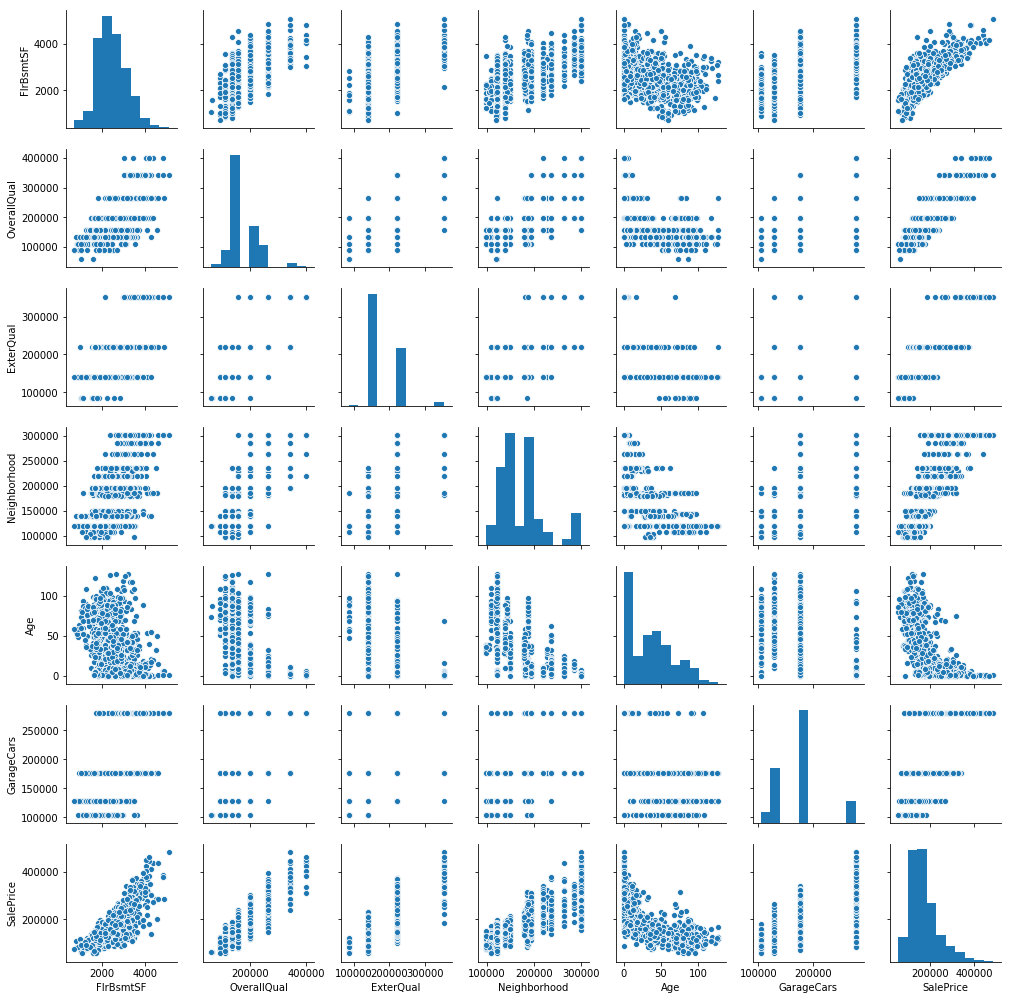

In [27]:
df = train.loc[:,['FlrBsmtSF', 'OverallQual', 'ExterQual', 'Neighborhood', 'Age', 'GarageCars', 'SalePrice']]
sns.pairplot(df, height = 2.0)
plt.show()

In [28]:
Age = train.loc[:,['Age']].values
X_pre = train.loc[:,['FlrBsmtSF','OverallQual', 'ExterQual', 'Neighborhood', 'GarageCars']].values
y = train.loc[:,['SalePrice']].values
quad = PolynomialFeatures(degree=2)
Age_quad = quad.fit_transform(Age)
X = np.concatenate((Age_quad, X_pre), axis = 1)
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_std_train, y_train)
# 自由度調整済み決定係数（R^2）
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score
print('adjusted R^2')
print('train: %.3f' % adjusted(lr.score(X_std_train, y_train), len(y_train), 7))
print('test : %.3f' % adjusted(lr.score(X_std_test, y_test), len(y_test), 7))

adjusted R^2
train: 0.874
test : 0.898


In [29]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)
# 交差検証を実行
# (モデル, 説明変数, 目的変数, 分割の方法)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_std, y, cv=kf)
scores

array([0.89867727, 0.89196249, 0.85622723, 0.85648619, 0.89427681])

In [30]:
# 交差検証精度の平均を出力
scores.mean()

0.8795259973265314

In [31]:
# 交差検証精度の標準偏差を出力
scores.std()

0.01904042749648376

In [32]:
# MSEを出力する関数を読み込む
from sklearn.metrics import mean_squared_error as mse
# RMSEをtrianとtestに分けて出力
# 過学習をしているかどうかを確認
print('RMSE')
print('train: %.3f' % (mse(y_train, lr.predict(X_std_train)) **(1/2)))
print('test : %.3f' % (mse(y_test, lr.predict(X_std_test)) **(1/2)))

RMSE
train: 23183.308
test : 19138.361


In [33]:
lr.intercept_

array([171738.16573033])

In [34]:
lr.coef_

array([[     0.        ,   9324.03703007, -12502.69689543,
         22701.51867204,  23165.05266531,   6963.07234832,
         10860.82579569,   6070.52776683]])

In [35]:
Agetest = test.loc[:,['Age']].values
X_test_pre = test.loc[:,['FlrBsmtSF','OverallQual', 'ExterQual', 'Neighborhood','GarageCars']].values
quad = PolynomialFeatures(degree=2)
Agetest_quad = quad.fit_transform(Agetest)
X_test = np.concatenate((Agetest_quad, X_test_pre), axis = 1)
sctest = StandardScaler()
test_data_std = sctest.fit_transform(X_test)
y_pred = lr.predict(test_data_std).reshape(-1)

In [36]:
# 提出csvファイルの作成
submit_file = pd.DataFrame({'Id' : test['Id'], 'SalePrice' : y_pred})
submit_file.to_csv('submit.csv', index = False)